# Morfología<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

**<h1> Geometric Operations and Other Mathematical Tools</h1>**

---

> - ## Objetivos

- En la primera parte del laboratorio, aplicará transformaciones geométricas a una imagen. Esto le permite realizar diferentes operaciones como remodelar la traducción, es decir, para cambiar, remodelar y rotar la imagen.

- En la segunda parte de la práctica de laboratorio, aprenderá cómo aplicar algunas operaciones básicas de matriz y matriz a la imagen.

---

<ul>
    <li><a href='#PT'> Operaciones Geometricas  </a>
        <ul>
            <li>Escalado</li>
            <li>Traslado</li>
            <li>Rotacion</li>   
          </ul>
        <li><a href='#PT'>  Operaciones Matemáticas   </a>
        <ul>
            <li>Operaciones Array  </li>
            <li>Operaciones Matriciales</li> 
          </ul>

</ul>

---
---

> ## Descarga de las imagenes para el lab:

- Lo primero que relizaremos es descargar las imagenes que utilizaremos y manipularemos a lo largo del laboratorio.


---
- Usaremos las siguientes funciones importadas en este laboratorio:

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

- Primero, definamos una función auxiliar para trazar dos imágenes una al lado de la otra. No necesitará comprender este código en este momento, pero esta función se usará repetidamente en este tutorial para mostrar los resultados.

In [3]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

## Transformaciones Geometricas

- Las transformaciones geométricas le permiten realizar diferentes operaciones como la traducción, es decir, para cambiar, remodelar y rotar la imagen.

- Podemos cambiar el tamaño de una imagen usando el método `resize()` de las imágenes `PIL`, que toma el `width` "ancho" y `height` "altura" de la imagen redimensionada como parámetros.

Considere la siguiente imagen:

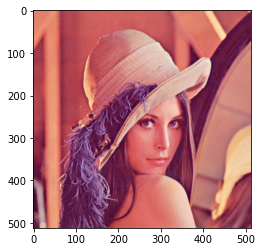

In [4]:
image = Image.open("lenna.png")
plt.imshow(image)
plt.show()

- Podemos escalar el eje horizontal en dos y dejar el eje vertical como está:

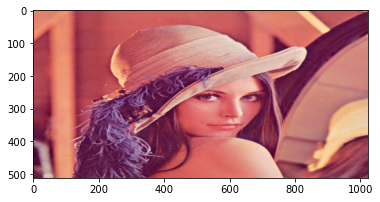

In [5]:
width, height = image.size
new_width = 2 * width
new_height = height
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

- De la misma manera, podemos escalar el eje vertical en dos:

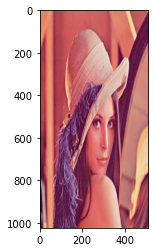

In [6]:
new_width = width
new_height = 2 * height
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

- Podemos duplicar tanto el ancho como el alto de la imagen: 

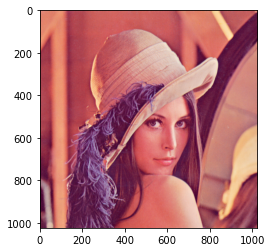

In [8]:
new_width = 2 * width
new_height = 2 * height
new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

- También podemos reducir el ancho y la altura de la imagen a la mitad:

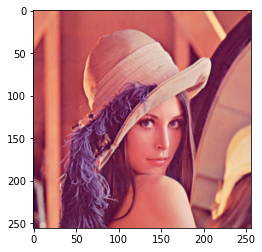

In [9]:
new_width = width // 2
new_height = height // 2

new_image = image.resize((new_width, new_height))
plt.imshow(new_image)
plt.show()

---

## Rotacion

- Podemos rotar una imagen por ángulo $\theta$, usando el método `rotate`.

- Podemos rotar nuestra toy image en 45 grados:

In [16]:
theta = 45
new_image = image.rotate(theta)

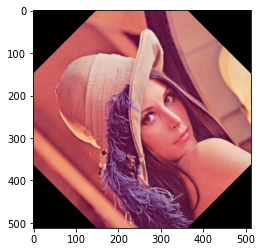

In [17]:
plt.imshow(new_image)
plt.show()

---

## Operaciones Array

- Podemos realizar operaciones de matriz en una imagen; Usando **Python broadcasting**, podemos agregar una constante al valor de intensidad de cada píxel.

- Antes de hacer eso, primero debemos convertir la imagen PIL en una matriz numpy.

In [18]:
image = np.array(image)

- Luego podemos agregar la constante a la matriz de imágenes:

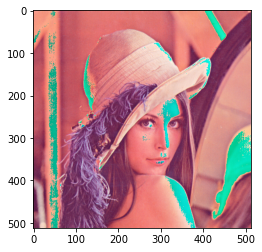

In [22]:
new_image = image + 20
plt.imshow(new_image)
plt.show()

- También podemos multiplicar el valor de intensidad de cada píxel por un valor constante.

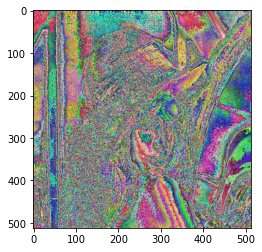

In [27]:
new_image = 10 * image
plt.imshow(new_image)
plt.show()

- Podemos sumar los elementos de dos matrices de igual forma. En este ejemplo, generamos una matriz de ruidos aleatorios con la misma forma y tipo de datos que nuestra imagen.

In [28]:
Noise = np.random.normal(0,20,(height,width,3)).astype(np.uint8)
Noise.shape

(512, 512, 3)

- Agregamos el ruido generado a la imagen y trazamos el resultado. Vemos los valores que han corrompido la imagen:

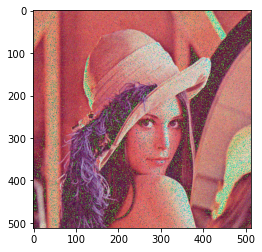

In [29]:
new_image = image + Noise

plt.imshow(new_image)
plt.show()

- Al mismo tiempo, podemos multiplicar los elementos de dos matrices de igual forma. Podemos multiplicar la imagen aleatoria y la imagen de Lenna y trazar el resultado.

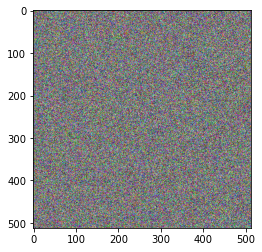

In [30]:
new_image = image*Noise

plt.imshow(new_image)
plt.show()

---
## Operaciones de Matrices

- Las imágenes en escala de grises son matrices. Considere la siguiente imagen en escala de grises:

In [31]:
im_gray = Image.open("barbara.png")

- Aunque la imagen es gris, tiene tres canales; podemos convertirlo en una imagen de un canal.

In [32]:
from PIL import ImageOps

In [34]:
im_gray = ImageOps.grayscale(im_gray)

- Podemos convertir la imagen PIL en una matriz numpy:

In [35]:
im_gray = np.array(im_gray )

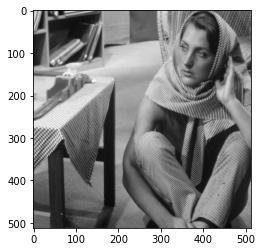

In [36]:
plt.imshow(im_gray,cmap='gray')
plt.show()

- Podemos aplicar algoritmos diseñados para matrices. Podemos usar la descomposición de valores singulares, descomponiendo nuestra matriz de imagen en un producto de tres matrices.

In [39]:
U, s, V = np.linalg.svd(im_gray , full_matrices=True)

- Vemos que `s` no es rectangular

In [38]:
s.shape

(512,)

- Podemos convertir `s` en una matriz diagonal `S`:

In [40]:
S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

- Podemos graficar la matriz U y V:

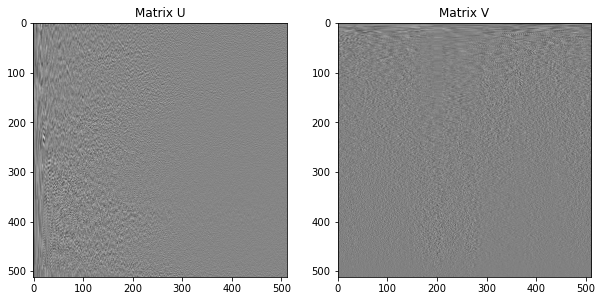

In [41]:
plot_image(U, V, title_1="Matrix U", title_2="Matrix V")

- Vemos que la mayoría de los elementos en S son cero:

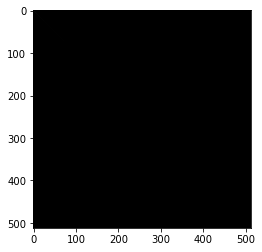

In [42]:
plt.imshow(S, cmap='gray')
plt.show()

- Podemos encontrar el producto matricial de todas las matrices. Primero, podemos realizar la multiplicación de matrices en S y U y asignarla a `B` y graficar los resultados:

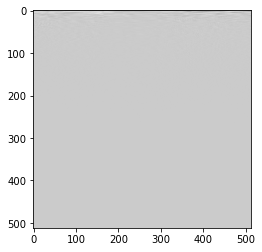

In [43]:
B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()

- Podemos encontrar la matriz producto de `U`, `S`, y `B`. 

Vemos que es la imagen completa:


In [44]:
A = U.dot(B)

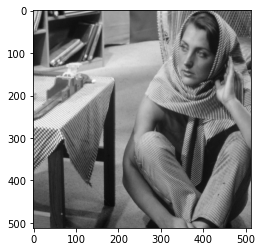

In [45]:
plt.imshow(A,cmap='gray')
plt.show()

- Resulta que muchos elementos son redundantes. Podemos eliminar algunas filas y columnas de S y V y aproximar la imagen encontrando el producto:

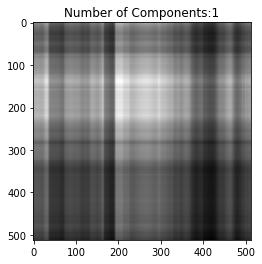

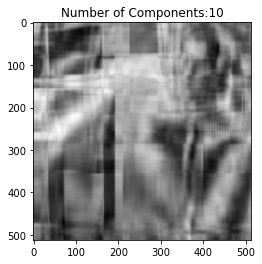

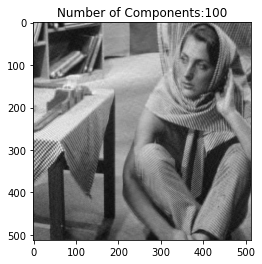

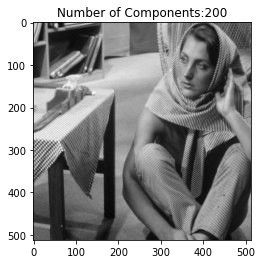

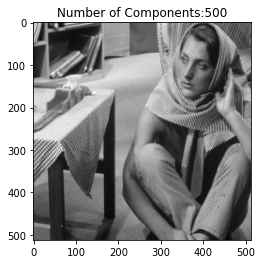

In [46]:
for n_component in [1,10,100,200, 500]:
    S_new = S[:, :n_component]
    V_new = V[:n_component, :]
    A = U.dot(S_new.dot(V_new))
    plt.imshow(A,cmap='gray')
    plt.title("Number of Components:"+str(n_component))
    plt.show()

- Vemos que solo necesitamos de 100 a 200 componentes para representar la imagen.

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).